
## ECEN250 Lab 3 Notebook

### Part 1: Perceptron
Perceptron is a learning algorithm for binary classification. In this part we will learn how this algorithm works.

First, we create a linear separable dataset.
Each samples has two features `x1` and `x2`, and one label `y`.

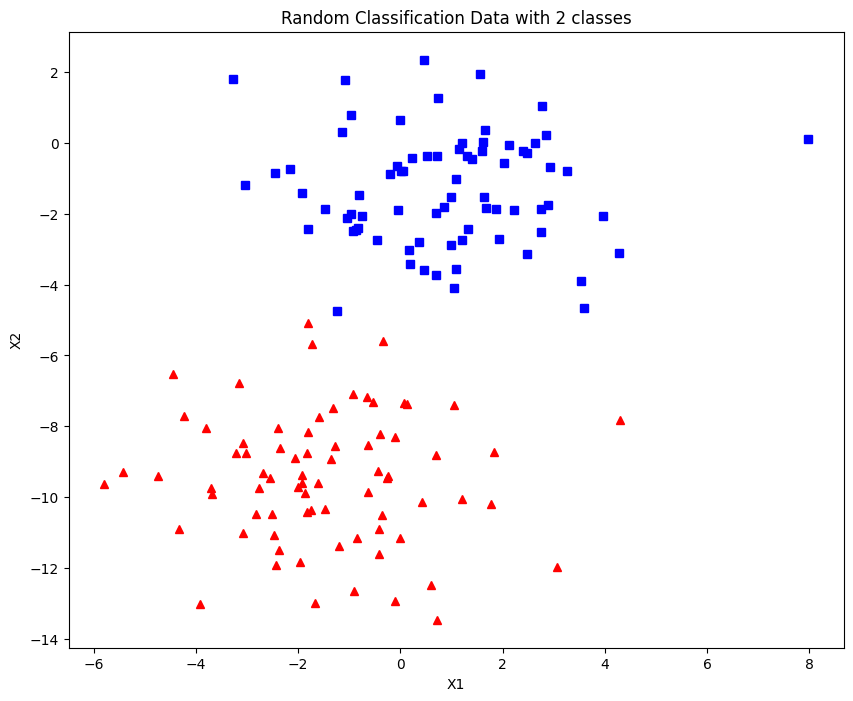

In [61]:
from matplotlib import pyplot as plt
from sklearn import datasets
import numpy as np

# We create a separable dataset with two clusters.
X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.7,
                           random_state=2)
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('Random Classification Data with 2 classes')
plt.show()

We define a step function as follows.

In [62]:
#Define step function
def step_func(z):
  return 1.0 if (z>0) else 0.0

Please **insert a code block below**, to plot the function `step_func(z)` with `z` ranges from `-1` to `1`.  
If you're unsure how to do this, please refer the following website:   
https://www.tutorialspoint.com/how-to-plot-a-function-defined-with-def-in-python-matplotlib


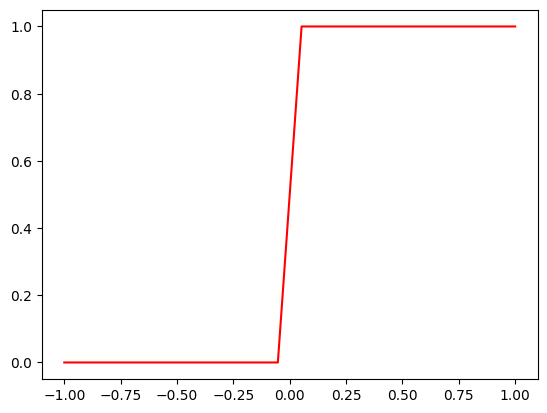

In [63]:
x = np.linspace(-1,1,20)
yy = [step_func(xx) for xx in x]
plt.plot(x, yy, color='red')

Now we define a function, that trains a binary classifier.  
This function returns the trained parameters `theta` and number of missclassified samples in each training iteration `n_miss_list`.

Define a function to plot the decision boundary, with a dataset `X`, and a set of trained parameters `theta`.

In [64]:
def plot_decision_boundary(X, theta, ax, epoch):

    # X --> Inputs
    # theta --> parameters
    # ax -> Matplotlib axis to graph on
    # epoch -> the current epoch

    # The Line is y=mx+c
    # So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c

    # Plotting
    ax.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
    ax.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_title(f"Perceptron Learning Algorithm  - Epoch {epoch}")
    ax.plot(x1, x2, 'y-')

In [65]:
#Perceptron Learning Algorithm
def perceptron(X, y, lr, epochs):

    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.

    # m-> number of training examples
    # n-> number of features
    m, n = X.shape

    # Initializing parapeters(theta) to zeros.
    # +1 in n+1 for the bias term.
    thetas = np.zeros((epochs, n+1, 1))
    theta = np.zeros((n+1,1))

    # Empty list to store how many examples were
    # misclassified at every iteration.
    n_miss_list = []

    # Training.
    for epoch in range(epochs):

        # variable to store #misclassified.
        n_miss = 0

        # looping for every example.
        for idx, x_i in enumerate(X):

            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)

            # Calculating prediction/hypothesis.
            # y_hat = theta[0] * 1 + theta[1] * x1 + theta[2] * x2
            y_hat = step_func(np.dot(x_i.T, theta))

            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*x_i)


                # Incrementing by 1.
                n_miss += 1

        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
        # Store the theta for this iteration for later plotting
        thetas[epoch] = theta

    return thetas, n_miss_list

Now we use the functions defined above to train a binary classifier for 10 epochs, and plot the decistion boundaries after each epoch.

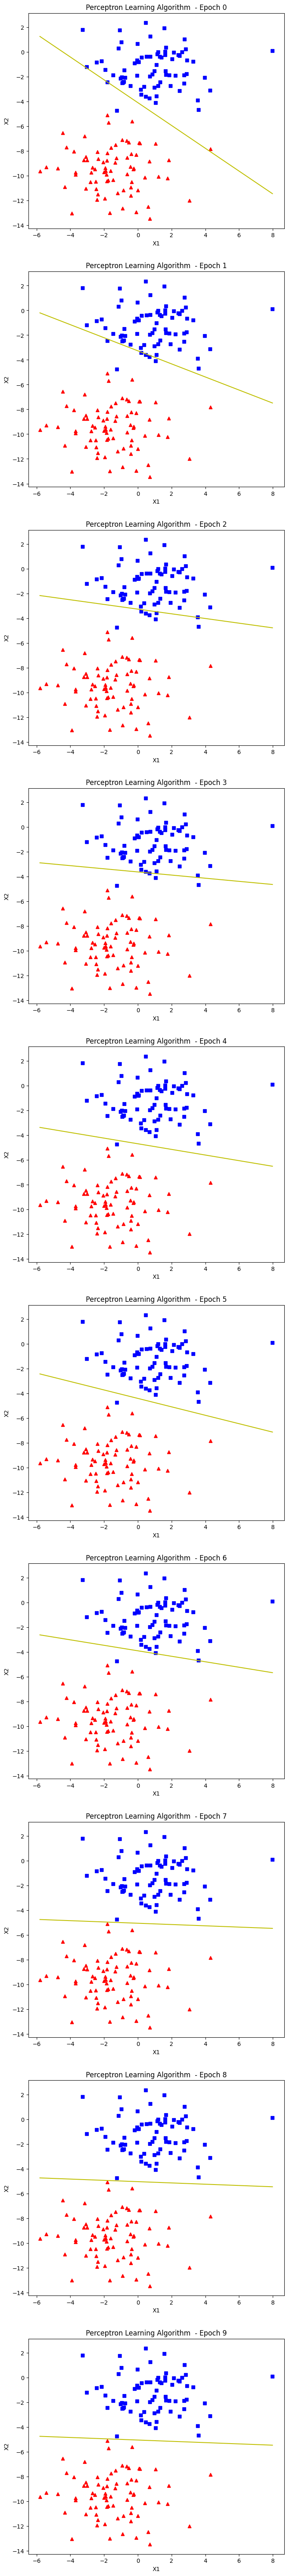

In [66]:
#Run example with more data points
epochs = 10
fig, axs = plt.subplots(epochs, 1, figsize=(8,80))
thetas, miss_l = perceptron(X, y, 0.5, epochs)
for epoch in range(epochs):
    plot_decision_boundary(X, thetas[epoch], axs[epoch], epoch)

Please review the images above, and list the number of misclassified datapoints in each epochs.

epoch_0: 4,
epoch_1: 6
epoch_2: 8,
epoch_3: 5,
epoch_4: 1,
epoch_5: 1,
epoch_6: 2,
epoch_7: 0,
epoch_8: 0,
epoch_9: 0   

If you check the details of the code above, the `perceptron` function automatically returns the number of missclassified points in each epoches:

In [67]:
print("# missclassified:", miss_l)

# missclassified: [24, 13, 10, 6, 3, 7, 3, 4, 0, 0]


Does this result match with your observation?

No this result does not match my observation of missclassified points.

Now we print out the trained parameters theta:

In [68]:
for idx, theta_i in enumerate(thetas[-1]):
  print("theta[", idx, "] = ", theta_i)

theta[ 0 ] =  [16.]
theta[ 1 ] =  [0.16466832]
theta[ 2 ] =  [3.17068872]


Recall that we use $\hat{y} = \theta_0 \cdot 1 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2$ for training, which means the decision boundary should be the line where $\hat{y} = 0$.   
Please insert a text block below, write the linear function (with the numbers from the printed theta above) that represent the decision boundary.   
Does it match with the decision boundary plotted above?



y^ = (16 * 1) + (0.16466832 * x1) + (3.17068872 * x2)

No the linear function above does not match the decision boundary of y^ = 0.

###PART 2 Clustering Examples


We will practice clustering on synthetic cluster datasets.  We will then do clustering on our blower data.

Start by importing necessary libraries -- including make_blobs that create the synthetic clusters

In [69]:
import numpy as np
import os
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
from sklearn import datasets
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

Create a synthetic cluster dataset

In [70]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [71]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

Plot the data set

In [72]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

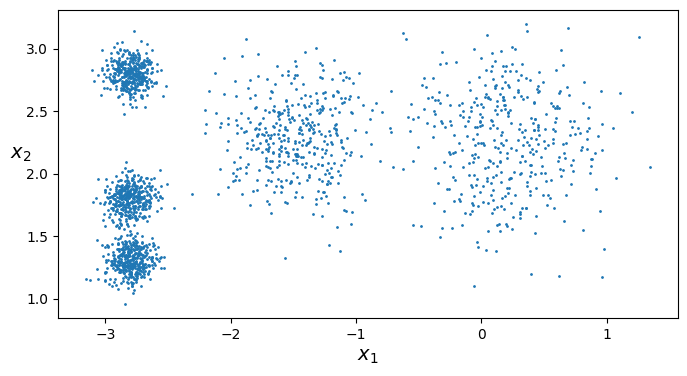

In [73]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

Notice this uses scatter plots -- which we use extensively to visualize clustering in 2D. How many clusters do you see?  Now let's do k-means clustering

In [74]:
from sklearn.cluster import KMeans

Now we are going to do k-means clustering.  This example is very obvious on the number of clusters that we should use.  Modify the following cell to specify the k value for this k-means example.  Once the k (which we call a hyperparameter) is specified, we use the method KMeans to specify that we will use the k-means clustering technique with n_clusters clusters.  In the next line, we use the method fit_predict of kmeans on our data X from above.  fit_predict first creates a model for the X dataset, then applies predict which returns the result of the model.  At times, we fit and predict in separate uses of those methods.

In [75]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


We can use the kmeans attribute cluster_centers_ to show where the k-means model means or "centroids" were located when it completed the iterative assignment/mean movement process that we discussed in lecture. Where are the centroids? List them:

In [76]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

We can now use this clustering to predict which cluster new observations belong. Notice that here we use the predict method to give us predictions for the 4 new points that we are interested in. The model returns the cluster number for which the mean is closest to the new point.

In [77]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

This code will allows to look at the data together with the centroid (mean locations) and the boundaries that show which mean is closest to all of the areas in our 2D example:

In [78]:
def plot_data(X):
    #plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, edgecolor='k')
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=24, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Call this for the X data that we just clustered into the model kmeans:

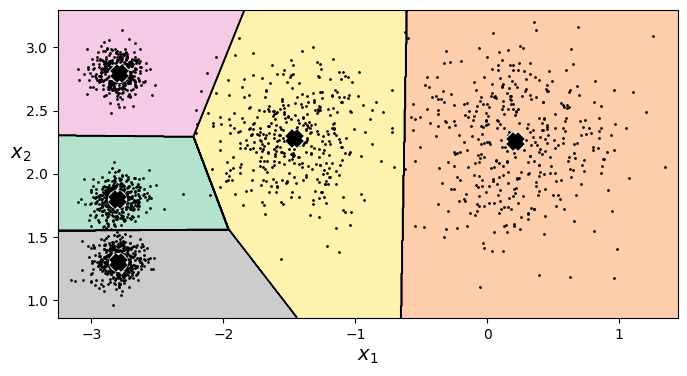

In [79]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

Recall that kmeans is an iterative algorithm which starts with a (randomly) assigned location for centroids, assigns observed data to centroids, adjusts the centroid locations, and reassigns the cluster assignments to the new centroid locations, and repeats until no changes are required. Let's look at the first few iterations --- the following cell contains the code for the first iteration.  Notice that KMeans will set intial means locations, assign nearest, and compute the updated mean locations in 1 iteration.  You control the number of iterations that run through the max_iter parameter.  Modify the following cell to have three different models: kmeans_iter1, kmeans_iter2, and kmeans_iter3 for 1, 2, and 3 iterations.

In [80]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", max_iter=1, random_state=0)

kmeans_iter1.fit(X)

kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", max_iter=2, random_state=0)

kmeans_iter2.fit(X)

kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", max_iter=3, random_state=0)

kmeans_iter3.fit(X)


KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=0)

Now we can plot how our k-means improves as we add iterations.  Plot the three we just created:

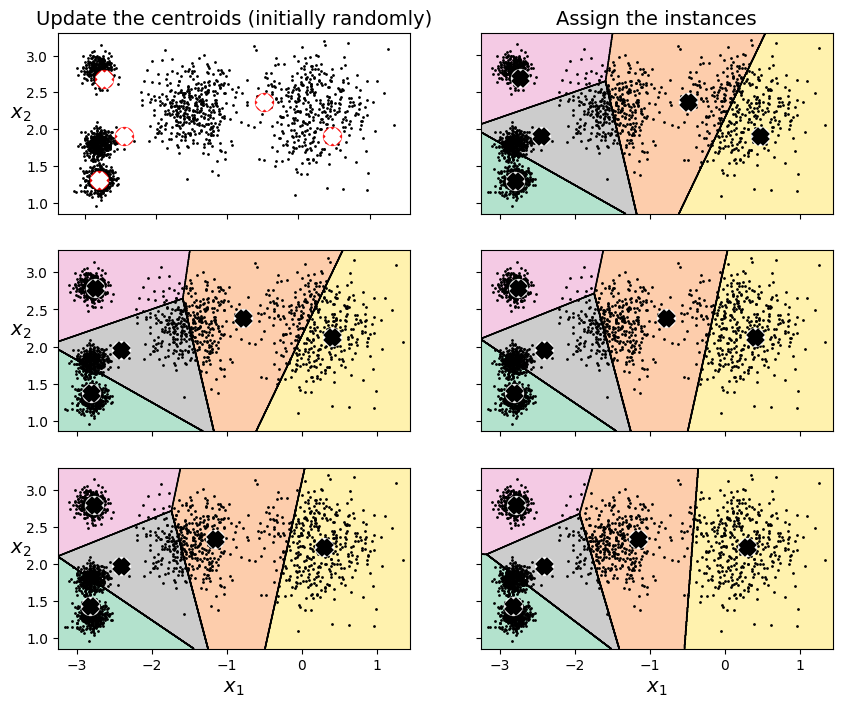

In [81]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Assign the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

Since the initial centroid assignment is done randomly, the same data can be clustered differently with different random initial assignments. The random assignment is controlled by the parameter random_state.  Lets first create some code to compare 2 clustering solutions side-by-side:

In [82]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

Now let's create two  differnet clustering solutions for the same data (X) by instantiating two different models, each optimized from a different random initial mean location placement.  Modify the following cell for difference random_states. Run the cell to see the difference.  Then try using the same random_state.  Are the solutions different?  Finally choose another set of different random states and rerun this cell.

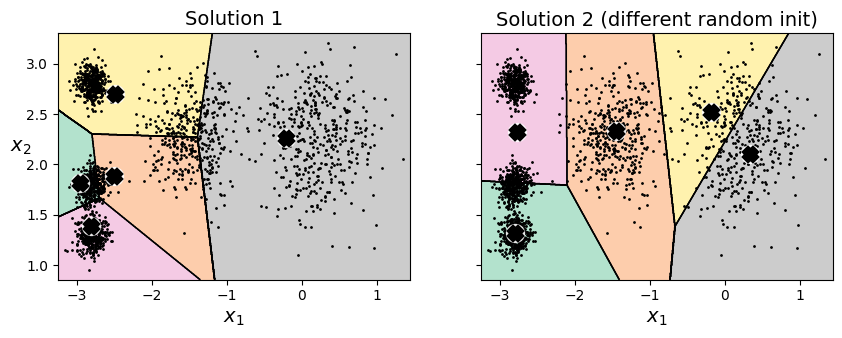

In [83]:
import random
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init= 1,
                     algorithm="lloyd", max_iter=1, random_state=1)

kmeans_rnd_init1.fit(X)

kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init= 1,
                     algorithm="lloyd", max_iter=1, random_state=2)

kmeans_rnd_init2.fit(X)


plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (different random init)")

plt.show()

To select the best model, we will need a way to evaluate a K-Mean model's performance. We can use inertia (the sum of the squared distances between each training instance and its closest centroid)as a metric:

In [84]:
kmeans.inertia_

211.5985372581684

See how the two examples above have different intertia (make sure you reran the example with different random_state values!)

In [85]:
kmeans_rnd_init1.inertia_

619.6250534846793

In [86]:
kmeans_rnd_init2.inertia_

337.46476411698285

Because we have a way to compare our results with inertia, we can run the clustering multiple times (n_init times) and select the clustering with the minimum inertia:

In [87]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="lloyd", random_state=2)
kmeans_rnd_10_inits.fit(X)

KMeans(init='random', n_clusters=5, n_init=10, random_state=2)

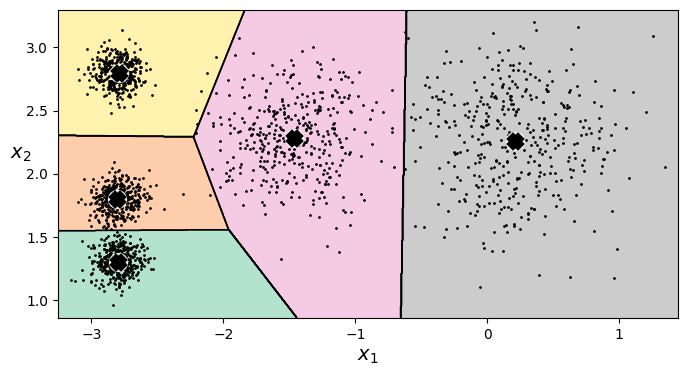

In [88]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

Experiment by varying the number of initializations.  Remember that because these are random, with a single initialization you may get the best solution ... and sometimes it may take very many tries at the random initialization.  10 initializations is probably more than we need for this simple example, but for more complex datasets it can require that many, or more!

So, we can find best clustering for a given k, but how do we find the best number of clusters?

We've tried 5. Let's try a smaller and larger k. Add a cell after this cell that creates two kmeans models -- one for k=3 and another for k=8.  Then use the plot_clusterer_comparison() function defined above to compare the two results.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


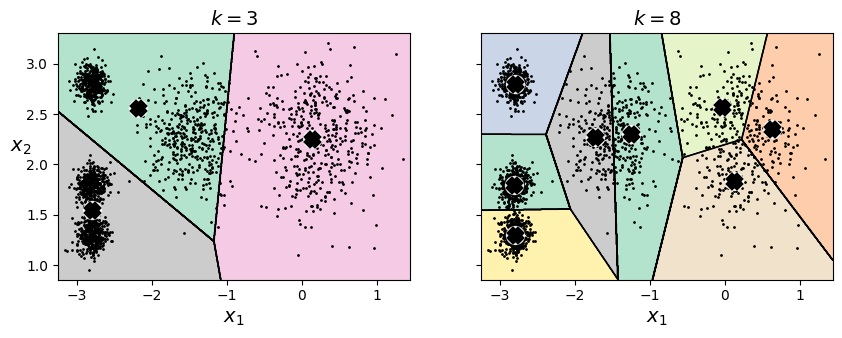

In [89]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

Compare these results to the k=5 example from above. Which k seems to fit our dataset best?

k=3 seems to fit our dataset the best.

Remember that we have a way to compare our k_means models:  inertia.  Insert cells below this cell to print the inertia from your k=3 and your k=8 models.

In [90]:
print(kmeans_k3.inertia_)
print(kmeans_k8.inertia_)

653.216719002155
119.11983416102879


If we used minimum inertia as our metric, which model gives the best results?

The k=8 model has the lowest inertia.

Is that consistent with the plots that we have just looked at?

Yes the k=8 model is consitent.

So, inertia alone isn't what we need, since it decreases with increasing k [This should be obvious, right?! -- since it is the sum of squared distance to the nearest centroid). More centroids means we can place them close to our data.  What would our inertia be if we use 2000-means on our X data?  Recall X is made up of 2000 data points.

A better metric is to see how inertia changes as we consider additional clusters.  The following code computes inertia for k=1 to k=10.

In [91]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

By plotting this data, we can see where adding additional means (adding one to k) begins to help less and less.  That point is called the elbow.

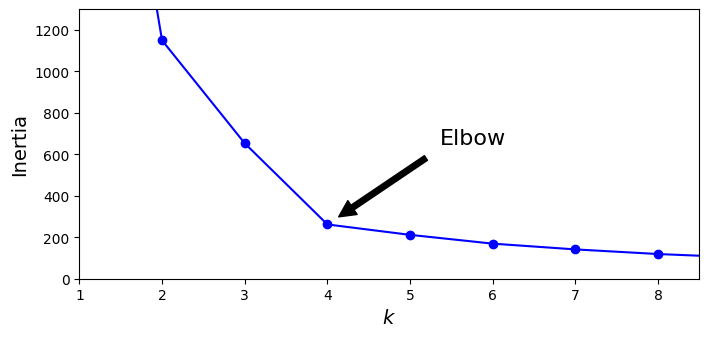

In [92]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

So, we can look at changes in inertia as a selection criteria for k -- we should be using k values at or above the elbow in the trend. In this example, k=4 does not quite accuractly capture the clustering characteristics, but 5 does!

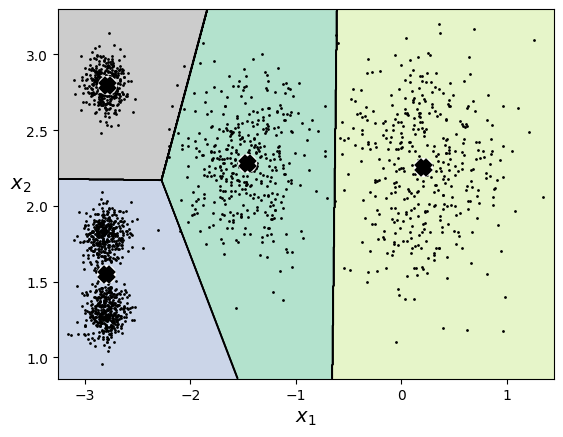

In [93]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

Let's look at where k-means struggles -- where clusters are elongated or intertwined. Here the metric of sum of squared distance to the centroid leads to too simple modeling.  First let's create a dataset:

In [94]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

Insert a cell with a call to our clustering plotter for this new dataset X. Like we did above for the simple 5 cluster blobs set.

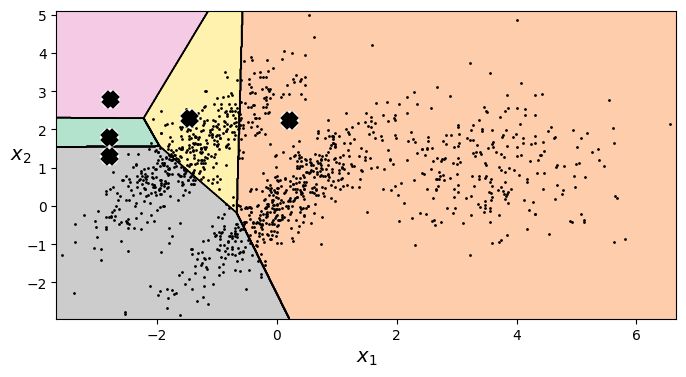

In [95]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

We are going to let KMeans try to find good solution with a random initialization, and with an initialization that we give to the clusterer:

In [96]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

Lets compare the two -- visually and by computing inertias:

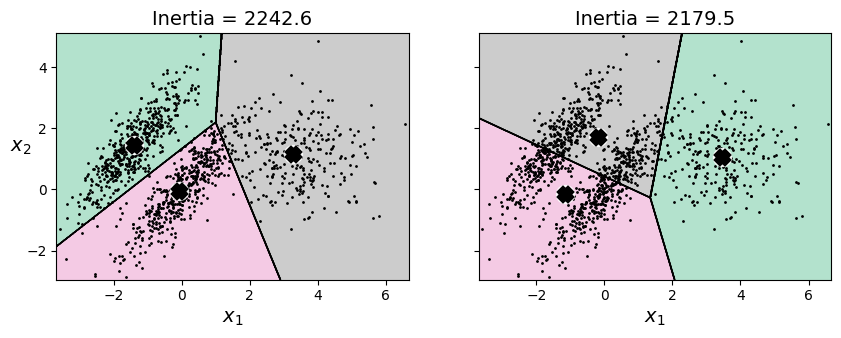

In [97]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

Notice, again that inertia isn't always a measure of the bests clustering solution.

Refer back to the lecture notes -- Scikit-learn has many other clustering models that more accurately handle cases like this for which k-means is not the best model! Choose a clustering method that seems more appropriate for the clusters we are using. Insert a cell below that uses your improved clustering method our X data with a better clustering method. [NOTE you will probably need to import that clusterer before you use it!]

In [98]:
from sklearn.cluster import SpectralClustering

# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')

# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(X)

Since most of the alternative clustering methods are not implemented with predict() methods, showing decision boundaries like we have done for k-means isn't practical.  Instead let's just look at the assignment of the X points to clusters by coloring the dataset by class.  You need to modify the following cell to match the model that you created in the above cell!

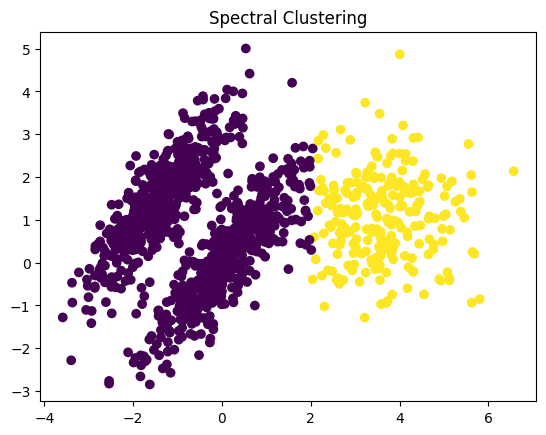

In [99]:
#Visualizing the data
plt.scatter(X[:, 0], X[:, 1], c=spectral_model_rbf.labels_)
plt.title('Spectral Clustering')
plt.show()

### Part 3: Statistics on Blower Data

In [100]:
import numpy as np
import pandas as pd

In [101]:
from matplotlib import pyplot
from pandas import DataFrame

In [102]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


You should still have a csv file that you saved at the end of last lab in your drive.  If it is not there -- or you did not complete last lab, you need to complete it, find it, and use it here!

In [103]:
!ls drive/MyDrive/ColabNotebooks/Lab3/ECEN250LeafBlowersClean.csv

drive/MyDrive/ColabNotebooks/Lab3/ECEN250LeafBlowersClean.csv


In [104]:
# importing dataset
df = pd.read_csv('drive/MyDrive/ColabNotebooks/Lab3/ECEN250LeafBlowersClean.csv', encoding = 'unicode_escape')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Manufacturer                                          50 non-null     object 
 1   Model identifier                                      50 non-null     object 
 2   Retail source                                         50 non-null     object 
 3   Battery voltage                                       50 non-null     int64  
 4   Number of batteries included                          50 non-null     int64  
 5   Battery capacity in Ahr                               50 non-null     float64
 6   Weight of battery in lbs                              50 non-null     float64
 7   Motor type                                            50 non-null     float64
 8   Sound rating in db                                    50 non-n

Insert code to drop the source field and any unnamed fields that may have come with your CSVs!

Make sure this is the right file with the right features:

In [106]:
df.head()

,Manufacturer,Model identifier,Retail source,Battery voltage,Number of batteries included,Battery capacity in Ahr,Weight of battery in lbs,Motor type,Sound rating in db,Airflow in cubic feet/min on high-speed setting,Airflow in cubic feet/min on low-speed setting,Air velocity in miles per hour on high-speed setting,Air velocity in miles per hour on low-speed setting,Weight of blower with battery installed in lbs,Price,Data source(s) where you found data
0,RYOBI,P21081,Home Depot,18,1,4.0,1.74,0.5,65.0,280,280,100,100,6.20,149.00,https://www.homedepot.com/p/RYOBI-ONE-18V-100-...
1,RIDGID,R860430,Home Depot,18,0,4.0,1.85,0.5,94.5,280,280,105,105,6.82,79.97,https://www.homedepot.com/p/RIDGID-18V-Cordles...
2,RIDGID,R86043,Home Depot,18,0,4.0,1.85,0.5,79.0,110,110,160,160,3.87,69.00,https://www.homedepot.com/p/RIDGID-18V-Lithium...
3,Black+Decker,LSW321,Home Depot,20,1,2.0,0.90,0.5,54.0,100,100,130,130,4.95,119.00,https://www.homedepot.com/p/BLACK-DECKER-20V-M...
4,Black+Decker,LSW36,Home Depot,40,1,1.5,1.95,0.5,59.0,90,90,125,125,5.96,117.58,https://www.homedepot.com/p/BLACK-DECKER-40V-M...


Make sure that everything except the manufacturer and model and retail information are numeric:

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Manufacturer                                          50 non-null     object 
 1   Model identifier                                      50 non-null     object 
 2   Retail source                                         50 non-null     object 
 3   Battery voltage                                       50 non-null     int64  
 4   Number of batteries included                          50 non-null     int64  
 5   Battery capacity in Ahr                               50 non-null     float64
 6   Weight of battery in lbs                              50 non-null     float64
 7   Motor type                                            50 non-null     float64
 8   Sound rating in db                                    50 non-n

In [108]:
df

,Manufacturer,Model identifier,Retail source,Battery voltage,Number of batteries included,Battery capacity in Ahr,Weight of battery in lbs,Motor type,Sound rating in db,Airflow in cubic feet/min on high-speed setting,Airflow in cubic feet/min on low-speed setting,Air velocity in miles per hour on high-speed setting,Air velocity in miles per hour on low-speed setting,Weight of blower with battery installed in lbs,Price,Data source(s) where you found data
0,RYOBI,P21081,Home Depot,18,1,4.0,1.740,0.5,65.0,280,280,100,100,6.200,149.00,https://www.homedepot.com/p/RYOBI-ONE-18V-100-...
1,RIDGID,R860430,Home Depot,18,0,4.0,1.850,0.5,94.5,280,280,105,105,6.820,79.97,https://www.homedepot.com/p/RIDGID-18V-Cordles...
2,RIDGID,R86043,Home Depot,18,0,4.0,1.850,0.5,79.0,110,110,160,160,3.870,69.00,https://www.homedepot.com/p/RIDGID-18V-Lithium...
3,Black+Decker,LSW321,Home Depot,20,1,2.0,0.900,0.5,54.0,100,100,130,130,4.950,119.00,https://www.homedepot.com/p/BLACK-DECKER-20V-M...
4,Black+Decker,LSW36,Home Depot,40,1,1.5,1.950,0.5,59.0,90,90,125,125,5.960,117.58,https://www.homedepot.com/p/BLACK-DECKER-40V-M...
5,Black+Decker,LSW221,Home Depot,20,1,1.5,0.900,0.5,61.0,100,100,130,130,4.950,96.99,https://www.homedepot.com/p/BLACK-DECKER-20V-M...
6,Dewalt,DCBL777Y1,Home Depot,60,1,4.0,2.250,0.0,62.0,760,760,160,160,14.617,379.00,https://www.homedepot.com/p/DEWALT-60-Volt-MAX...
7,Black+Decker,LSWV36,Home Depot,40,1,1.5,1.950,0.5,65.0,90,90,120,120,6.900,171.34,https://www.homedepot.com/p/BLACK-DECKER-40V-M...
8,RYOBI,RY404140,Home Depot,40,1,6.0,1.500,0.0,57.0,650,650,160,160,10.350,279.00,https://www.homedepot.com/p/RYOBI-40V-HP-Brush...
9,Dewalt,DCBL722BDCB246K,Home Depot,20,2,6.0,1.400,0.0,61.0,450,450,125,125,5.430,348.00,https://www.homedepot.com/p/DEWALT-20V-MAX-125...


Now that we have reloaded our clean blower data, lets look at some statistics

In [109]:
df['Price'].mean()

217.8616

Insert a cell to give the median of the price

In [110]:
df['Price'].median()

179.485

Let's do the standard deviations

In [111]:
df['Price'].std(ddof=0) # this is for the population standard deviation

138.98419749539875

In [112]:
df['Price'].std(ddof=1) # we use this if we're doing sample standard deviation

140.39524075252405

Recall we can get a summary of statistics for the full dataframe using the Pandas describe() method. Insert a cell and do the describe()

In [113]:
df.describe()

,Battery voltage,Number of batteries included,Battery capacity in Ahr,Weight of battery in lbs,Motor type,Sound rating in db,Airflow in cubic feet/min on high-speed setting,Airflow in cubic feet/min on low-speed setting,Air velocity in miles per hour on high-speed setting,Air velocity in miles per hour on low-speed setting,Weight of blower with battery installed in lbs,Price
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,33.480000,1.100000,3.430000,2.281560,0.260000,65.230000,435.220000,409.620000,135.860000,133.14000,8.336480,217.861600
std,14.975136,0.614452,1.815495,2.015061,0.252336,10.937303,206.421235,209.823628,30.622128,32.40308,5.877263,140.395241
min,12.000000,0.000000,0.000000,0.000000,0.000000,30.000000,90.000000,0.000000,85.000000,50.00000,2.600000,39.990000
25%,20.000000,1.000000,2.000000,1.107500,0.000000,61.000000,280.000000,250.000000,120.000000,117.00000,4.702500,104.217500
50%,36.000000,1.000000,4.000000,1.950000,0.500000,64.000000,454.500000,450.000000,130.000000,127.00000,6.400000,179.485000
75%,40.000000,1.000000,4.000000,3.035000,0.500000,65.000000,591.250000,550.000000,157.250000,154.00000,9.700000,296.370000
max,62.000000,2.000000,8.000000,13.250000,0.500000,96.000000,800.000000,800.000000,200.000000,200.00000,30.000000,659.000000


What type of standard deviation is the default for pandas statistics?  Can you explain why they made that choice?


The default standard deviation for pandas is N-1 sample deviation. This is found by taking the square root of the variance. Since most dataframe will not contain the entire population defaulting to sample make sense.

We can also look at statistics for subsets of our blowers.  For instance we can look a differences in the mean price for entries with zero, one, and two batteries:

In [114]:
nobat=df.loc[df['Number of batteries included'] == 0]
onebat=df.loc[df['Number of batteries included'] == 1]
twobat=df.loc[df['Number of batteries included'] == 2]

In [115]:
nobat['Price'].mean()

193.28142857142856

In [116]:
onebat['Price'].mean()

201.82967741935482

In [117]:
twobat['Price'].mean()

273.6158333333333

Open a text cell following this cell and (1) compare the difference in mean between zero and 1 battery and the difference in mean price between 1 and 2 batteries.  Should these differences be the same?  Why might they be different?

If you have no samples or just a few of one of the number of battery categories, these statistics will not be accurate or meaningful.  If our sampling plan did not cover all of these classes, we should consider adding additional observations to get more of each type [you can do that by finding additional samples from the internet, rerunning portions of your lab1 notebook, and rerunning this notebook up to this point.  This is exactly why we use dataframes in notebooks!

1. The difference mean from zero batteries to 1 battery is 8.548248848. The difference mean from 1 battery to 2 batteries is 71.78615591.

2. The differences should not be the same as certain leaf blowers require both batteries to run simulatinously due to the leaf blowers greater performance.

Histograms help us see how our data is distributed -- and help us visualize where our sampling plans may be limiting our analysis

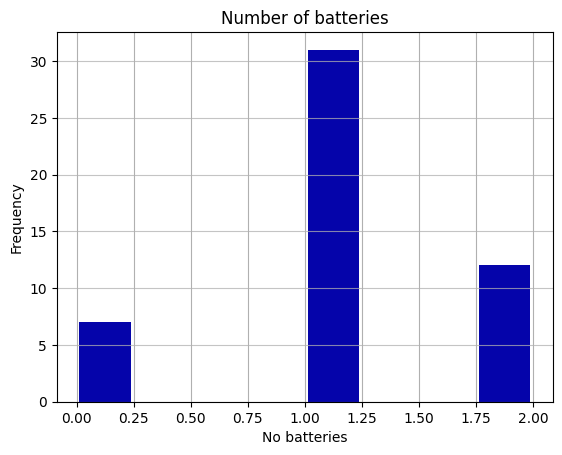

In [118]:
df['Number of batteries included'].plot.hist(grid=True, bins=8, rwidth=0.9,
                   color='#0504aa')
pyplot.title("Number of batteries")
pyplot.ylabel('Frequency')
pyplot.xlabel('No batteries')
pyplot.grid(axis='y', alpha=0.75)

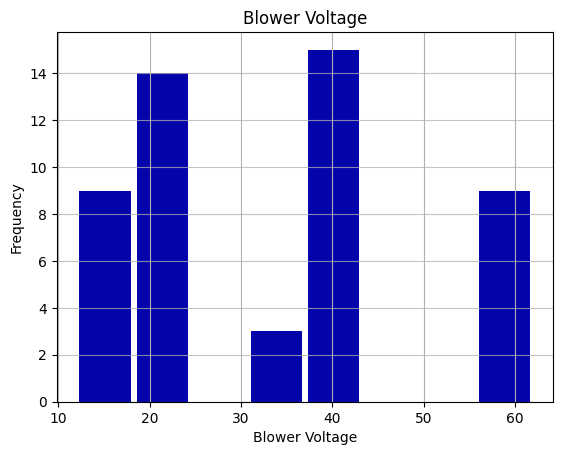

In [119]:
df['Battery voltage'].plot.hist(grid=True, bins=8, rwidth=0.9,
                   color='#0504aa')
pyplot.title('Blower Voltage')
pyplot.ylabel('Frequency')
pyplot.xlabel('Blower Voltage')
pyplot.grid(axis='y', alpha=0.75)

Insert a code cell which creates an 8-bin histogram for the hi cfm feature

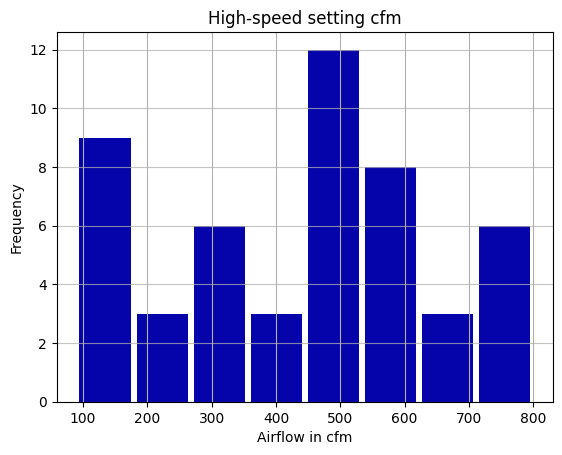

In [120]:
df['Airflow in cubic feet/min on high-speed setting'].plot.hist(grid=True, bins=8, rwidth=0.9,
                   color='#0504aa')
pyplot.title('High-speed setting cfm')
pyplot.ylabel('Frequency')
pyplot.xlabel('Airflow in cfm')
pyplot.grid(axis='y', alpha=0.75)

Now insert an 8-bin histogram for price.  Put labels on the x and y axes which describe what the axes represents.

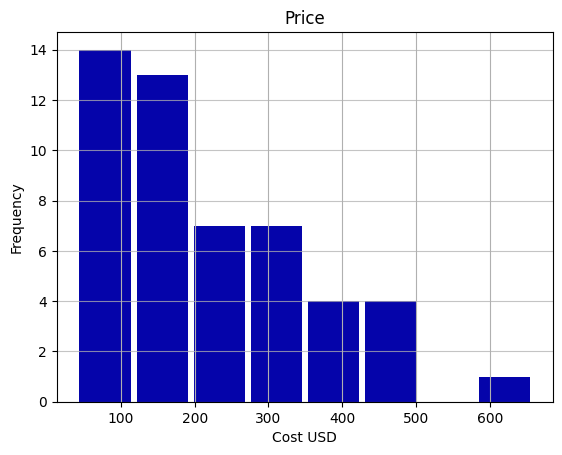

In [121]:
df['Price'].plot.hist(grid=True, bins=8, rwidth=0.9,
                   color='#0504aa')
pyplot.title('Price')
pyplot.ylabel('Frequency')
pyplot.xlabel('Cost USD')
pyplot.grid(axis='y', alpha=0.75)

As we saw above describe() gives us lots of statistics about our features.  

In [122]:
df.describe()

,Battery voltage,Number of batteries included,Battery capacity in Ahr,Weight of battery in lbs,Motor type,Sound rating in db,Airflow in cubic feet/min on high-speed setting,Airflow in cubic feet/min on low-speed setting,Air velocity in miles per hour on high-speed setting,Air velocity in miles per hour on low-speed setting,Weight of blower with battery installed in lbs,Price
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,33.480000,1.100000,3.430000,2.281560,0.260000,65.230000,435.220000,409.620000,135.860000,133.14000,8.336480,217.861600
std,14.975136,0.614452,1.815495,2.015061,0.252336,10.937303,206.421235,209.823628,30.622128,32.40308,5.877263,140.395241
min,12.000000,0.000000,0.000000,0.000000,0.000000,30.000000,90.000000,0.000000,85.000000,50.00000,2.600000,39.990000
25%,20.000000,1.000000,2.000000,1.107500,0.000000,61.000000,280.000000,250.000000,120.000000,117.00000,4.702500,104.217500
50%,36.000000,1.000000,4.000000,1.950000,0.500000,64.000000,454.500000,450.000000,130.000000,127.00000,6.400000,179.485000
75%,40.000000,1.000000,4.000000,3.035000,0.500000,65.000000,591.250000,550.000000,157.250000,154.00000,9.700000,296.370000
max,62.000000,2.000000,8.000000,13.250000,0.500000,96.000000,800.000000,800.000000,200.000000,200.00000,30.000000,659.000000


Use a boxplot (you used boxplot in Lab 2 -- look back if you can't remember the syntax for the method) to look at how the prices are distributed.

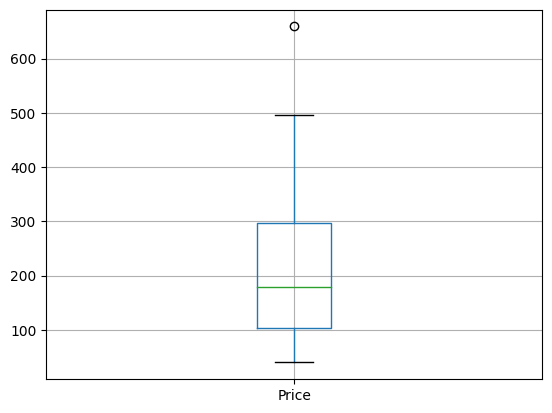

In [123]:
boxplot = df.boxplot(column=['Price'])

Do you have blowers with prices outside the wiskers?  What should we do with these -- keep them in our analysis? exclude them?  Justify your answer.

Their is one blower outside the whiskers around 700. Since the highest whisker is 500 exlcuding this data value is best.

Our anaysis gets more complicated and more revealing if we look at multiple features and the relationships between these features.  Let's start with a
scatter plot for performance -- hi cfm vs hi mph


In [124]:
import matplotlib.pyplot as plt

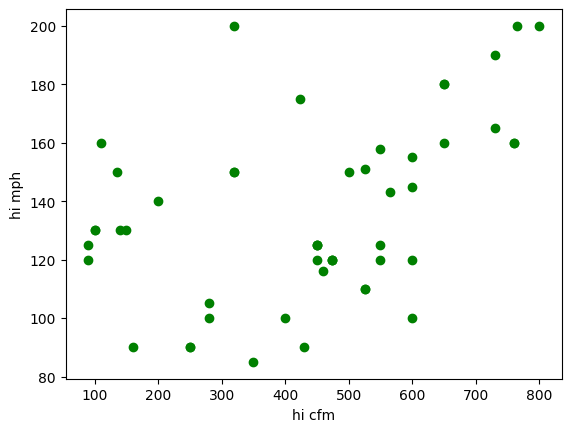

In [125]:
# Plot outputs
pyplot.scatter(df['Airflow in cubic feet/min on high-speed setting'], df['Air velocity in miles per hour on high-speed setting'], color="green", label="Test")


pyplot.xlabel("hi cfm")
pyplot.ylabel("hi mph")
#pyplot.xlim((-1, 8))
#pyplot.ylim((0, 18))

pyplot.show()

Now look at hi mph vs price. Insert a cell to show the cluster plot.

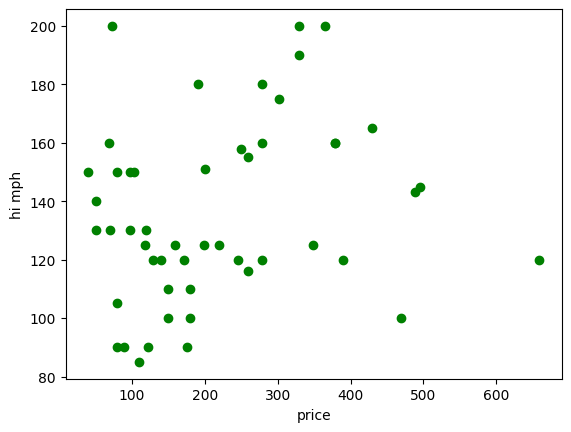

In [126]:
# Plot outputs
pyplot.scatter(df['Price'], df['Air velocity in miles per hour on high-speed setting'], color="green", label="Test")

pyplot.xlabel("price")
pyplot.ylabel("hi mph")
#pyplot.xlim((-1, 8))
#pyplot.ylim((0, 18))

pyplot.show()

One thing is is likely to be a problem in your dataset is weight.  The instructions for the lab call for you to find the weight of the blower with one battery installed -- since this is what the user will feel.  The problem is that you may have gathered weight data that was shipping weight -- which may have had no batteries, 1, 2, or 4 batteries.  Now would be a good time to look at whether you have a problem and fix it.  You may need to add weight or subtract weight from the shipping weights --- or you may go back and fix your data and rerun all of the lab 2 and lab 3 to recover this.  You can instead add a new feature which is blower w/ 1 battery and use pandas to manipulate the data you have.

Looking at weight statistics may help you find problem entries.  For example: look at no. batteries vs weight

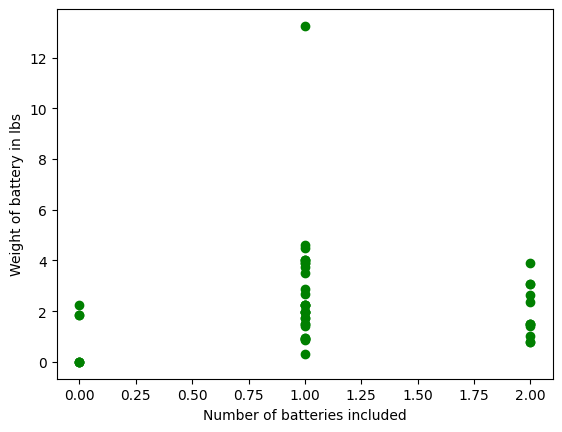

In [127]:
# Plot outputs
pyplot.scatter(df['Number of batteries included'], df['Weight of battery in lbs'], color="green", label="Test")


pyplot.xlabel("Number of batteries included")
pyplot.ylabel("Weight of battery in lbs")
#pyplot.xlim((-1, 8))
#pyplot.ylim((0, 18))

pyplot.show()

Or price -- it might also help to do this for only one voltage at a time

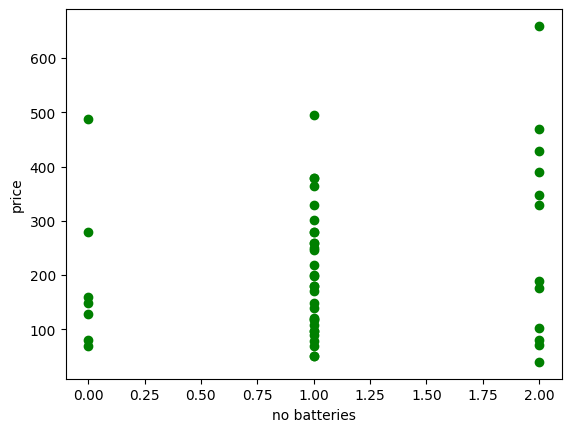

In [128]:
# Plot outputs
pyplot.scatter(df['Number of batteries included'], df['Price'], color="green", label="Test")


pyplot.xlabel("no batteries")
pyplot.ylabel("price")
#pyplot.xlim((-1, 8))
#pyplot.ylim((0, 18))

pyplot.show()

NOW: we can look at how different features in our dataframe are related to each other.  Recall from lecture that covariance give a measure of relation between the variances of two random variables (features).  We can compute covariances using df.cov()

In [129]:
df.cov()

<ipython-input-129-6f98a29763d5>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,Battery voltage,Number of batteries included,Battery capacity in Ahr,Weight of battery in lbs,Motor type,Sound rating in db,Airflow in cubic feet/min on high-speed setting,Airflow in cubic feet/min on low-speed setting,Air velocity in miles per hour on high-speed setting,Air velocity in miles per hour on low-speed setting,Weight of blower with battery installed in lbs,Price
Battery voltage,224.254694,0.012245,3.309796,12.185277,-0.760000,-16.510612,1745.055510,1271.063673,149.640000,149.502857,46.805969,892.593502
Number of batteries included,0.012245,0.377551,0.415306,0.126984,-0.006122,-0.380612,19.732653,22.344898,3.626531,3.904082,0.812196,17.165551
Battery capacity in Ahr,3.309796,0.415306,3.296020,1.130989,-0.134490,2.603163,201.117755,181.534082,19.918571,22.948776,4.410810,149.511645
Weight of battery in lbs,12.185277,0.126984,1.130989,4.060469,-0.038802,-0.294346,80.325772,61.864482,4.277611,1.334593,5.302078,34.271586
Motor type,-0.760000,-0.006122,-0.134490,-0.038802,0.063673,0.097143,-28.333878,-34.603265,-0.860816,-1.057551,-0.466923,-18.583486
Sound rating in db,-16.510612,-0.380612,2.603163,-0.294346,0.097143,119.624592,30.040204,-166.400612,-37.752857,25.293673,-8.861051,-232.534967
Airflow in cubic feet/min on high-speed setting,1745.055510,19.732653,201.117755,80.325772,-28.333878,30.040204,42609.726122,37956.799592,2821.684490,3265.193061,695.908749,19562.335763
Airflow in cubic feet/min on low-speed setting,1271.063673,22.344898,181.534082,61.864482,-34.603265,-166.400612,37956.799592,44025.954694,2141.088571,2513.544082,611.441288,18665.016335
Air velocity in miles per hour on high-speed setting,149.640000,3.626531,19.918571,4.277611,-0.860816,-37.752857,2821.684490,2141.088571,937.714694,893.366939,33.373089,981.395127
Air velocity in miles per hour on low-speed setting,149.502857,3.904082,22.948776,1.334593,-1.057551,25.293673,3265.193061,2513.544082,893.366939,1049.959592,38.494748,1210.593445


More often we examine Pearson's correlation coefficient, R, to determine how features are correlated. This is done with df.corr()

In [130]:
df.corr()

<ipython-input-130-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Battery voltage,Number of batteries included,Battery capacity in Ahr,Weight of battery in lbs,Motor type,Sound rating in db,Airflow in cubic feet/min on high-speed setting,Airflow in cubic feet/min on low-speed setting,Air velocity in miles per hour on high-speed setting,Air velocity in miles per hour on low-speed setting,Weight of blower with battery installed in lbs,Price
Battery voltage,1.000000,0.001331,0.121741,0.403809,-0.201124,-0.100805,0.564526,0.404522,0.326318,0.308101,0.531809,0.424552
Number of batteries included,0.001331,1.000000,0.372294,0.102559,-0.039487,-0.056635,0.155576,0.173315,0.192738,0.196085,0.224904,0.198984
Battery capacity in Ahr,0.121741,0.372294,1.000000,0.309154,-0.293572,0.131098,0.536662,0.476550,0.358284,0.390102,0.413379,0.586581
Weight of battery in lbs,0.403809,0.102559,0.309154,1.000000,-0.076310,-0.013355,0.193113,0.146318,0.069323,0.020440,0.447696,0.121142
Motor type,-0.201124,-0.039487,-0.293572,-0.076310,1.000000,0.035198,-0.543967,-0.653557,-0.111403,-0.129341,-0.314841,-0.524560
Sound rating in db,-0.100805,-0.056635,0.131098,-0.013355,0.035198,1.000000,0.013306,-0.072509,-0.112721,0.071370,-0.137848,-0.151435
Airflow in cubic feet/min on high-speed setting,0.564526,0.155576,0.536662,0.193113,-0.543967,0.013306,1.000000,0.876357,0.446394,0.488167,0.573618,0.675016
Airflow in cubic feet/min on low-speed setting,0.404522,0.173315,0.476550,0.146318,-0.653557,-0.072509,0.876357,1.000000,0.333231,0.369697,0.495821,0.633609
Air velocity in miles per hour on high-speed setting,0.326318,0.192738,0.358284,0.069323,-0.111403,-0.112721,0.446394,0.333231,1.000000,0.900343,0.185433,0.228274
Air velocity in miles per hour on low-speed setting,0.308101,0.196085,0.390102,0.020440,-0.129341,0.071370,0.488167,0.369697,0.900343,1.000000,0.202134,0.266109


This table tells us about important relationsips between features.  If we start with price, we see that price depends highly on the cfm  (which is a key performance characteristic!).  Also the price depends on the number of batteries included in the price. Weight is highly correlated with price. We see that with brushless=0 and brushed=1, that price is negatively correlated to price.  Brushed motor blowers are generally cheaper than brushless.

If your correlation results differ from the above, you may have insufficient data or incorrect data.  

To help us visualize where we may have issues with our data, we can use pair-plots.

In [131]:
import seaborn as sns


Using Seaborn pair-plotting, we can observe visually the correlations and the histogram distributions of the features.  With small datasets like ours the results are less obvious than some of the examples we have seen in lecture.

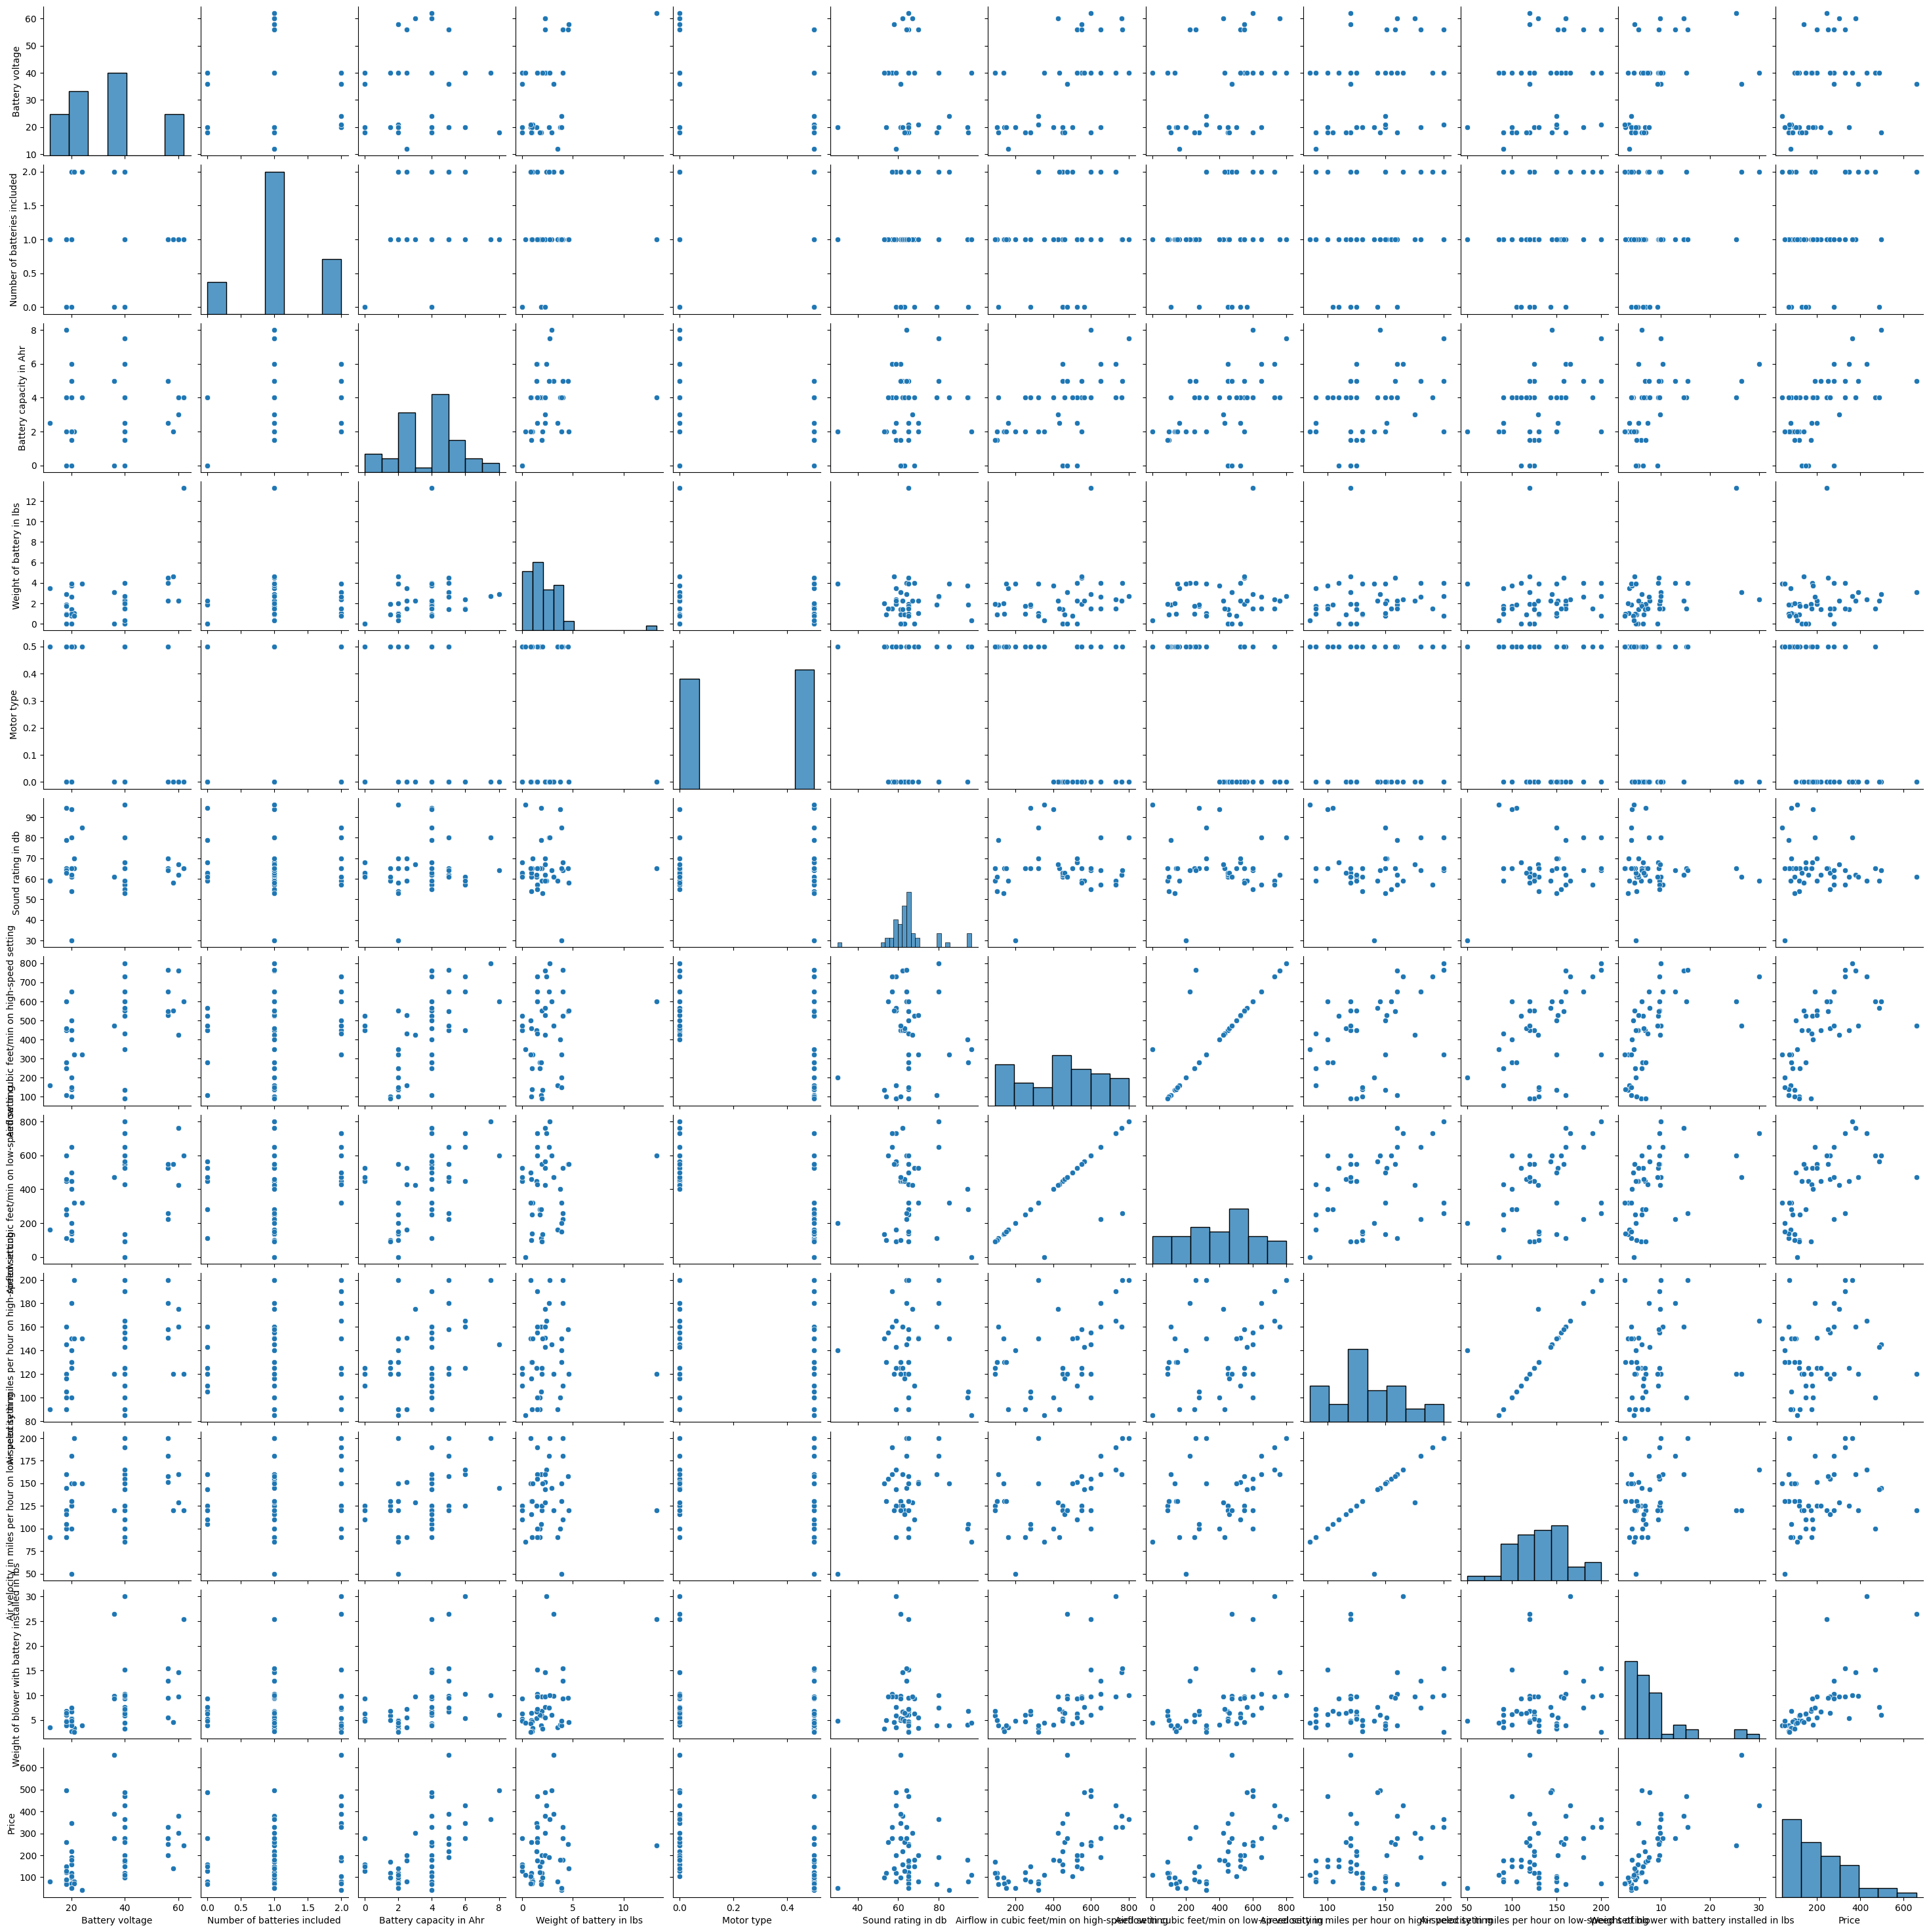

In [132]:
df_plot = df.iloc[:, 3:15]
sns.pairplot(df_plot, diag_kind='hist')

Note that the histograms on the diagonals help show us how the data in our features and distributed and where there are gaps.  Notice that highly correlated blobs of points in the pair-plot off-diagonal figures will be stretched out from lower left to upper right.  Uncorrelated will be blobs with rising or falling trends. Negatively correlated features will have pair plots that stretch from upper left to lower right -- look at price v. motor type above for an example.

Look at the scatter plots for hi vs lo cfm and hi vs lo mph.  There is probably a stong diagonal line in these -- what is that tell us about the data that we have gathered?

Given that price is highly correlated with high cfm, repeat the above analysis that included the scatter plot for the subset of data hi cfm and price.

### Part 4: Clustering with your blower data

For the data in the above scatter plot, let's use our k-means clustering technique to cluster that data -- let's try 3 clusters.

In [133]:
k = 3
kmeans = KMeans(n_clusters=k, init="random", n_init=10, algorithm="lloyd", random_state=1953)
X=df[['Airflow in cubic feet/min on high-speed setting','Price']].to_numpy()
y_pred = kmeans.fit_predict(X)

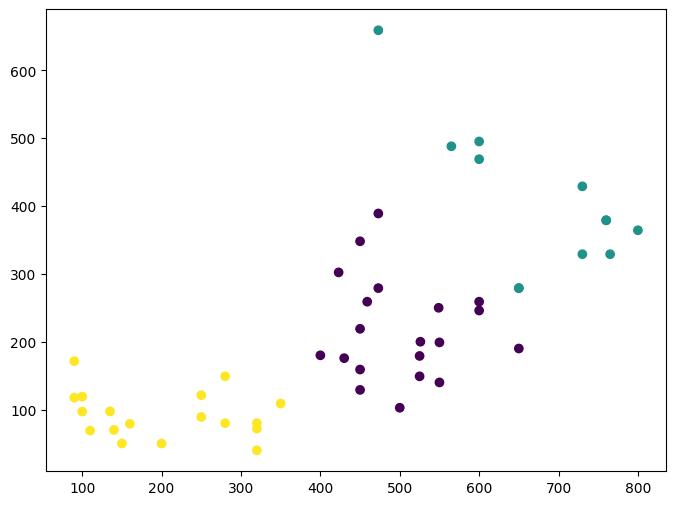

In [134]:
# Visualize it:
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_.astype(float))

Insert a cell below to do k-means clustering of hi cfm and hi mph

In [135]:
k = 5
kmeans = KMeans(n_clusters=k, init="random", n_init=10, algorithm="lloyd", random_state=1953)
X=df[['Airflow in cubic feet/min on high-speed setting','Price']].to_numpy()
y_pred = kmeans.fit_predict(X)


Plot it:

In [136]:
def plot_data(X):
    #plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, edgecolor='k')
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=24, linewidths=12,
                color=cross_color, zorder=11, alpha=1)
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 100
    maxs = X.max(axis=0) + 100
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

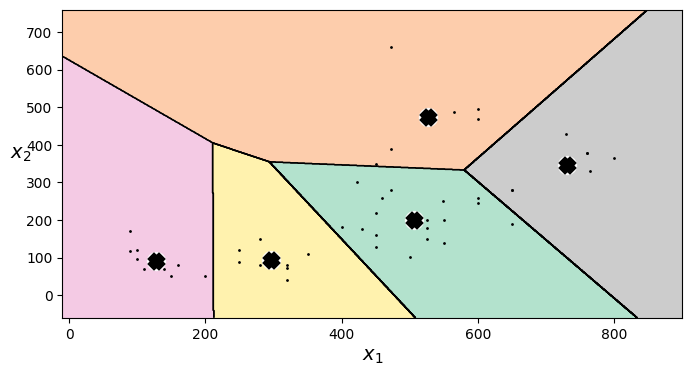

In [137]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

Go back 3 code cells and modify the line k=3 and rerun these cells.  Try a few values of k. Which seems to most closely represent the data in the scatter plot?  Recall we have the elbow method if we wanted to more fully analyze this.

The value of 5 closely represent the data in the scatter plot.

Repeat cluster analysis for price vs number of batteries included in the price.

Add the code cell to build the k-means clustering for k=3 for these two features.

In [138]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=1953)
X=df[['Number of batteries included', 'Price']].to_numpy()
y_pred = kmeans.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Again plot it, showing decision boundaries:

In [139]:
def plot_data(X):
    #plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, edgecolor='k')
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=24, linewidths=12,
                color=cross_color, zorder=11, alpha=1)
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 1
    maxs = X.max(axis=0) + 1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

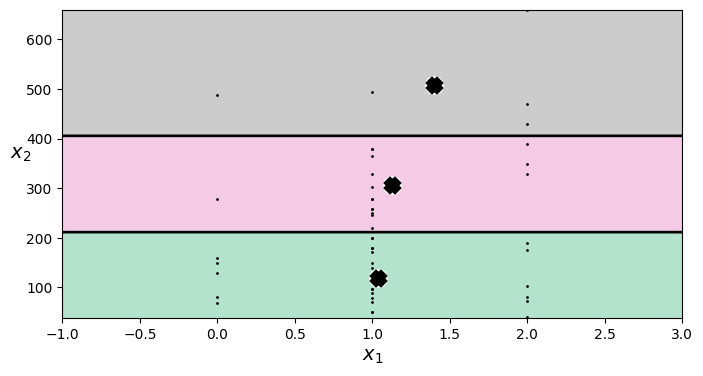

In [140]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

Does this look like reasonable clusters for the scatter diagram that we just saw?  You may think that there is a problem with the python code.....perhaps, but it is more likely that we have an issue with the data that we are trying to cluster.  Recall that clustering uses Euclidian distances in determining similarity for forming clusers. Open a cell following this and rerun df.describe()

In [141]:
df.describe()

,Battery voltage,Number of batteries included,Battery capacity in Ahr,Weight of battery in lbs,Motor type,Sound rating in db,Airflow in cubic feet/min on high-speed setting,Airflow in cubic feet/min on low-speed setting,Air velocity in miles per hour on high-speed setting,Air velocity in miles per hour on low-speed setting,Weight of blower with battery installed in lbs,Price
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,33.480000,1.100000,3.430000,2.281560,0.260000,65.230000,435.220000,409.620000,135.860000,133.14000,8.336480,217.861600
std,14.975136,0.614452,1.815495,2.015061,0.252336,10.937303,206.421235,209.823628,30.622128,32.40308,5.877263,140.395241
min,12.000000,0.000000,0.000000,0.000000,0.000000,30.000000,90.000000,0.000000,85.000000,50.00000,2.600000,39.990000
25%,20.000000,1.000000,2.000000,1.107500,0.000000,61.000000,280.000000,250.000000,120.000000,117.00000,4.702500,104.217500
50%,36.000000,1.000000,4.000000,1.950000,0.500000,64.000000,454.500000,450.000000,130.000000,127.00000,6.400000,179.485000
75%,40.000000,1.000000,4.000000,3.035000,0.500000,65.000000,591.250000,550.000000,157.250000,154.00000,9.700000,296.370000
max,62.000000,2.000000,8.000000,13.250000,0.500000,96.000000,800.000000,800.000000,200.000000,200.00000,30.000000,659.000000


Open a text cell following this cell and give the range of values for price and for no batteries.  Describe generally (no equations) how these difference will affect distances in the 2D plane for price vs no batteries. Suggest a technique that we covered in lecture that may improve this clustering analysis.

Range of values for price: 39.99 - 659.00
Range of values for no batteries: 0 - 2

Look at the slide from Lecture 4 on how to introduce scaled values into dataframes in Pandas.  In the cells below, create a new, scaled dataframe and use the scaled dataframe to repeat the price, no batteries clustering and k-means clustering from the last several cells

In [142]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

new_df = df[['Number of batteries included','Price']].copy()
standardized_df = scaler.fit_transform(new_df)
standardized_df = pd.DataFrame(new_df, columns=['Number of batteries included','Price'])

In [146]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=1953)
X=standardized_df[['Number of batteries included', 'Price']].to_numpy()
y_pred = kmeans.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


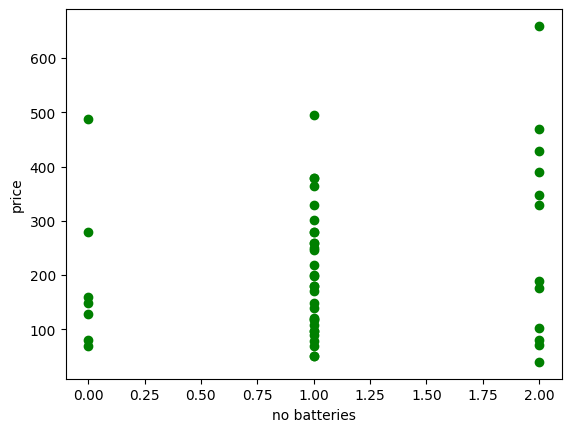

In [147]:
# Plot outputs
pyplot.scatter(standardized_df['Number of batteries included'], standardized_df['Price'], color="green")


pyplot.ylabel("price")
pyplot.xlabel("no batteries")
#pyplot.xlim((-1, 8))
#pyplot.ylim((0, 18))

pyplot.show()

In [148]:
def plot_data(X):
    #plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, edgecolor='k')
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=24, linewidths=12,
                color=cross_color, zorder=11, alpha=1)
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 1
    maxs = X.max(axis=0) + 1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

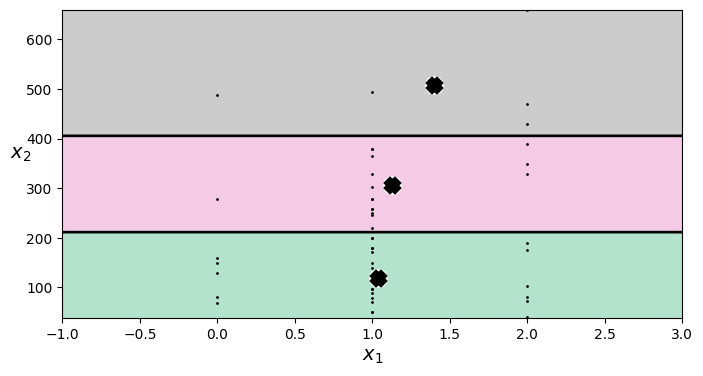

In [149]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

Notice that for numeric categorical features like number of batteries or voltage that even scaling for k-means doesn't give us decision boundaries that we might expect.  These might do better with an alternative clustering method.

This completes Lab 3.  Now make sure that this notebook shows all your executed cells. If it does not, you can restart the runtime and runall or you can restart the runtime and individually reexecute all of your cells.

Now download your notebook as an ipynb file and upload that file to canvas for your submission for Lab 3